# Final Project
## Analisa data menggunakan python(penyakit jantung)
## Nurhuda Maulana

In [1]:
# import library
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt
import pydotplus
from six import StringIO
from IPython.display import Image

In [2]:
df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Logistic Regression

In [3]:
# menyiapkan data
datajantung = pd.read_csv('data/heart.csv')
datajantung

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data_col = datajantung.columns
data_col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
datajantung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# menentukan x dan y
x = datajantung[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = datajantung['target']
print(x,y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [7]:
print(x.shape,y.shape)

(1025, 13) (1025,)


In [8]:
# membagi data tes dan prediksinya menggunakan 80% belajar dan 20% uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
# model training dan akurasi untuk logistic regression
rg = LogisticRegression(solver="liblinear")
rg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred_rg = rg.predict(x_test)

In [13]:
# cek akurasi model
print("akurasi:", accuracy_score(y_test, y_pred_rg))
print("classification report")
print(classification_report(y_test,y_pred_rg))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred_rg))

akurasi: 0.8634146341463415
classification report
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        94
           1       0.85      0.90      0.88       111

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

confusion matrix
[[ 77  17]
 [ 11 100]]


Text(0.5, 1.0, 'Logistic Regression(0-sehat, 1-jantung)')

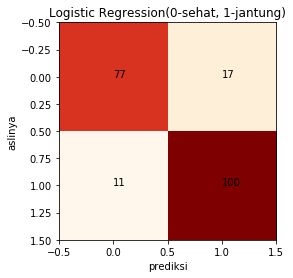

In [14]:
# visualisasi confusion matrix
cm_rg = confusion_matrix(y_test,y_pred_rg)
plt.imshow(cm_rg, cmap='OrRd')

for i in range(2):
    for j in range(2):
        plt.text(i,j,cm_rg[j,i])
        
plt.xlabel("prediksi")
plt.ylabel("aslinya")
plt.title("Logistic Regression(0-sehat, 1-jantung)")

dari data ini, logistic regression menghasilkan data akurasi 85% dengan:
- 77 data benar benar sehat
- 11 data prediksi salah untuk sehat
- 17 data prediksi salah untuk orang sakit jantung
- 100 data benar benar sakit jantung

# K-NN

In [15]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [16]:
# cek akurasi model
print("akurasi:", accuracy_score(y_test, y_pred_knn))
print("classification report")
print(classification_report(y_test,y_pred_knn))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred_knn))

akurasi: 0.7804878048780488
classification report
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        94
           1       0.81      0.78      0.79       111

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205

confusion matrix
[[73 21]
 [24 87]]


Text(0.5, 1.0, 'k-Nearest Neighbor(0-sehat, 1-jantung)')

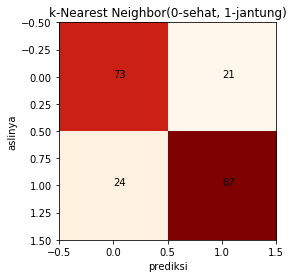

In [17]:
# visualisasi confusion matrix
cm_knn = confusion_matrix(y_test,y_pred_knn)
plt.imshow(cm_knn, cmap='OrRd')

for i in range(2):
    for j in range(2):
        plt.text(i,j,cm_knn[j,i])
        
plt.xlabel("prediksi")
plt.ylabel("aslinya")
plt.title("k-Nearest Neighbor(0-sehat, 1-jantung)")

dari data ini, k-Nearest Neighbor menghasilkan data akurasi 78 dengan:
- 73 data benar benar sehat
- 24 data prediksi salah untuk sehat
- 21 data prediksi salah untuk orang sakit jantung
- 87 data benar benar sakit jantung

# SVM


In [18]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train) 
#prediksi data jantung
y_pred_svm = svm_model.predict(x_test)

In [20]:
# cek akurasi model
print("akurasi:", accuracy_score(y_test, y_pred_svm))
print("classification report")
print(classification_report(y_test,y_pred_svm))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred_svm))

akurasi: 0.697560975609756
classification report
              precision    recall  f1-score   support

           0       0.67      0.66      0.67        94
           1       0.72      0.73      0.72       111

    accuracy                           0.70       205
   macro avg       0.70      0.69      0.69       205
weighted avg       0.70      0.70      0.70       205

confusion matrix
[[62 32]
 [30 81]]


Text(0.5, 1.0, 'Support Vector Machine(0-sehat, 1-jantung)')

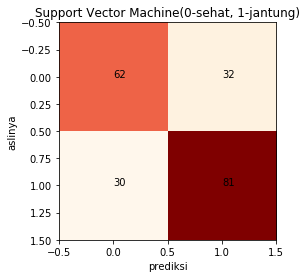

In [21]:
# visualisasi confusion matrix
cm_svm = confusion_matrix(y_test,y_pred_svm)
plt.imshow(cm_svm, cmap='OrRd')

for i in range(2):
    for j in range(2):
        plt.text(i,j,cm_svm[j,i])
        
plt.xlabel("prediksi")
plt.ylabel("aslinya")
plt.title("Support Vector Machine(0-sehat, 1-jantung)")

dari data ini, Support Vector Machine menghasilkan data akurasi 70% dengan:
- 62 data benar benar sehat
- 30 data prediksi salah untuk sehat
- 32 data prediksi salah untuk orang sakit jantung
- 81 data benar benar sakit jantung

# Decision Tree

In [22]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# prediksi data dt
y_pred_dt = dt.predict(x_test)

In [24]:
# cek akurasi model
print("akurasi:", accuracy_score(y_test, y_pred_dt))
print("classification report")
print(classification_report(y_test,y_pred_dt))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred_dt))

akurasi: 0.9853658536585366
classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.97      0.99       111

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

confusion matrix
[[ 94   0]
 [  3 108]]


Text(0.5, 1.0, 'Decision Tree(0-sehat, 1-jantung)')

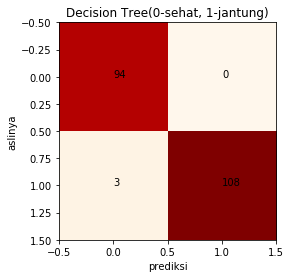

In [25]:
# visualisasi confusion matrix
cm_dt = confusion_matrix(y_test,y_pred_dt)
plt.imshow(cm_dt, cmap='OrRd')

for i in range(2):
    for j in range(2):
        plt.text(i,j,cm_dt[j,i])
        
plt.xlabel("prediksi")
plt.ylabel("aslinya")
plt.title("Decision Tree(0-sehat, 1-jantung)")

dari data ini, Decision Tree menghasilkan data akurasi 99% dengan:
- 94 data benar benar sehat
- 3 data prediksi salah untuk sehat
- 0 data prediksi salah untuk orang sakit jantung
- 108 data benar benar sakit jantung

# Random Forest

In [26]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
# prediksi data
y_pred_rf = rf.predict(x_test)

In [28]:
# cek akurasi model
print("akurasi:", accuracy_score(y_test, y_pred_rf))
print("classification report")
print(classification_report(y_test,y_pred_rf))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred_rf))

akurasi: 1.0
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       111

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

confusion matrix
[[ 94   0]
 [  0 111]]


Text(0.5, 1.0, 'Random Forest(0-sehat, 1-jantung)')

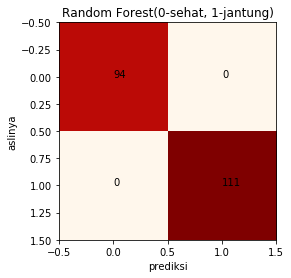

In [29]:
# visualisasi confusion matrix
cm_rf = confusion_matrix(y_test,y_pred_rf)
plt.imshow(cm_rf, cmap='OrRd')

for i in range(2):
    for j in range(2):
        plt.text(i,j,cm_rf[j,i])
        
plt.xlabel("prediksi")
plt.ylabel("aslinya")
plt.title("Random Forest(0-sehat, 1-jantung)")

dari data ini, Decision Tree menghasilkan data akurasi 100% dengan:
- 94 data benar benar sehat
- 0 data prediksi salah untuk sehat
- 0 data prediksi salah untuk orang sakit jantung
- 111 data benar benar sakit jantung

# Naive Bayes


In [30]:
#gaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
# Prediksi NB
y_pred_nb = nb.predict(x_test)

In [32]:
# cek akurasi model
print("akurasi:", accuracy_score(y_test, y_pred_nb))
print("classification report")
print(classification_report(y_test,y_pred_nb))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred_nb))

akurasi: 0.8682926829268293
classification report
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        94
           1       0.86      0.90      0.88       111

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

confusion matrix
[[ 78  16]
 [ 11 100]]


Text(0.5, 1.0, 'Naive Bias(0-sehat, 1-jantung)')

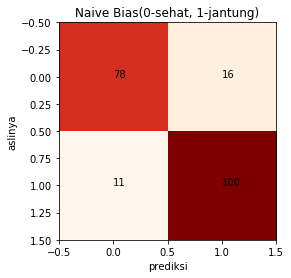

In [33]:
# visualisasi confusion matrix
cm_nb = confusion_matrix(y_test,y_pred_nb)
plt.imshow(cm_nb, cmap='OrRd')

for i in range(2):
    for j in range(2):
        plt.text(i,j,cm_nb[j,i])
        
plt.xlabel("prediksi")
plt.ylabel("aslinya")
plt.title("Naive Bias(0-sehat, 1-jantung)")

dari data ini, Decision Tree menghasilkan data akurasi 87% dengan:
- 78 data benar benar sehat
- 16 data prediksi salah untuk sehat
- 11 data prediksi salah untuk orang sakit jantung
- 100 data benar benar sakit jantung

# Kesimpulan

### Dari pengujian yang dilakukan dengan menggunakan data jantung(1025 rows × 14 columns), semuanya menggunakan pengujian dengan pembelajaran sebesar 70% dan pengujian sebesar 20%. Hasil pengujian adalah sebagai berikut:
- Akurasi terendah menggunakan Support Vector Machine
- Dalam data penyakit jantung ini, digunakan model Random Forest Karena mempunyai akurasi 100%


In [40]:
nama_fitur = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
print(nama_fitur)
print(rf.feature_importances_)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[0.09533928 0.03753384 0.13071891 0.07630168 0.08612288 0.01080339
 0.0194704  0.11404759 0.05743699 0.11829203 0.04446839 0.10063961
 0.10882501]


In [42]:
df_penting = pd.DataFrame({"fitur": nama_fitur,
             "level penting":rf.feature_importances_})
df_penting

,fitur,level penting
0,age,0.095339
1,sex,0.037534
2,cp,0.130719
3,trestbps,0.076302
4,chol,0.086123
5,fbs,0.010803
6,restecg,0.019470
7,thalach,0.114048
8,exang,0.057437
9,oldpeak,0.118292


In [43]:
df_penting.sort_values(by="level penting", ascending=False,
                      inplace=True)
df_penting

,fitur,level penting
2,cp,0.130719
9,oldpeak,0.118292
7,thalach,0.114048
12,thal,0.108825
11,ca,0.100640
0,age,0.095339
4,chol,0.086123
3,trestbps,0.076302
8,exang,0.057437
10,slope,0.044468
